# Datasets Utilizados

500 Covid-19 Positive 
1600 Covid-19 Negative

## Links dos Datasets

1. [Covid Chest X Ray Dataset](https://github.com/ieee8023/covid-chestxray-dataset)
2. [Pneumonia dataset by Praveen](https://www.kaggle.com/praveengovi/coronahack-chest-xraydataset)

In [1]:
!wget https://github.com/ieee8023/covid-chestxray-dataset/archive/refs/heads/master.zip

--2023-02-22 19:24:12--  https://github.com/ieee8023/covid-chestxray-dataset/archive/refs/heads/master.zip
Resolving github.com (github.com)... 20.205.243.166
Connecting to github.com (github.com)|20.205.243.166|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://codeload.github.com/ieee8023/covid-chestxray-dataset/zip/refs/heads/master [following]
--2023-02-22 19:24:12--  https://codeload.github.com/ieee8023/covid-chestxray-dataset/zip/refs/heads/master
Resolving codeload.github.com (codeload.github.com)... 20.205.243.165
Connecting to codeload.github.com (codeload.github.com)|20.205.243.165|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/zip]
Saving to: ‘master.zip’

master.zip              [       <=>          ] 525.03M  17.9MB/s    in 31s     

2023-02-22 19:24:44 (16.8 MB/s) - ‘master.zip’ saved [550535079]



In [2]:
!unzip master.zip

Archive:  master.zip
78543292f8b01d5e0ed1d0e15dce71949f0657bb
   creating: covid-chestxray-dataset-master/
   creating: covid-chestxray-dataset-master/.github/
 extracting: covid-chestxray-dataset-master/.github/FUNDING.yml  
   creating: covid-chestxray-dataset-master/.github/workflows/
  inflating: covid-chestxray-dataset-master/.github/workflows/tests.yml  
  inflating: covid-chestxray-dataset-master/.gitignore  
  inflating: covid-chestxray-dataset-master/README.md  
  inflating: covid-chestxray-dataset-master/SCHEMA.md  
   creating: covid-chestxray-dataset-master/annotations/
  inflating: covid-chestxray-dataset-master/annotations/covid-severity-scores.csv  
  inflating: covid-chestxray-dataset-master/annotations/imageannotation_ai_lung_bounding_boxes.json  
   creating: covid-chestxray-dataset-master/annotations/lungVAE-masks/
  inflating: covid-chestxray-dataset-master/annotations/lungVAE-masks/1-s2.0-S0140673620303706-fx1_lrg_mask.png  
  inflating: covid-chestxray-dataset-mas

In [3]:
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
from google.colab import files
files.upload()         # expire any previous token(s) and upload recreated token

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"leonardoalb","key":"f4c83b2bf734f5c1f30f4ff42fb3bc47"}'}

In [5]:
!rm -r ~/.kaggle
!mkdir ~/.kaggle
!mv ./kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets list

rm: cannot remove '/root/.kaggle': No such file or directory
ref                                                        title                                       size  lastUpdated          downloadCount  voteCount  usabilityRating  
---------------------------------------------------------  -----------------------------------------  -----  -------------------  -------------  ---------  ---------------  
themrityunjaypathak/covid-cases-and-deaths-worldwide       Covid Cases and Deaths WorldWide             8KB  2023-02-01 12:22:51           5035        146  1.0              
datascientistanna/customers-dataset                        Shop Customer Data                          23KB  2023-02-07 18:42:21           3749         98  1.0              
rajugc/imdb-top-250-movies-dataset                         IMDB Top 250 Movies Dataset                 52KB  2023-02-11 16:02:01           1596         48  1.0              
ahsan81/hotel-reservations-classification-dataset          Hotel Rese

In [6]:
!kaggle datasets download -d praveengovi/coronahack-chest-xraydataset --unzip

100% 1.19G/1.19G [00:53<00:00, 24.1MB/s]
100% 1.19G/1.19G [00:53<00:00, 24.0MB/s]


In [7]:
#importando as bibliotecas e os datasets que serão utilizados

import pandas as pd
import os
import numpy as np

datapath1='covid-chestxray-dataset-master'
dataset_path='dataset'

!mkdir -p {dataset_path}/Covid19_Negative
!mkdir -p {dataset_path}/Covid19_Positive

categories=os.listdir(dataset_path)
print(categories)

dataset=pd.read_csv(os.path.join(datapath1,'metadata.csv'))
findings=dataset['finding']
image_names=dataset['filename']

['Covid19_Negative', 'Covid19_Positive']


In [8]:
findings

0      Pneumonia/Viral/COVID-19
1      Pneumonia/Viral/COVID-19
2      Pneumonia/Viral/COVID-19
3      Pneumonia/Viral/COVID-19
4      Pneumonia/Viral/COVID-19
                 ...           
945                   Pneumonia
946                   Pneumonia
947                   Pneumonia
948                   Pneumonia
949                   Pneumonia
Name: finding, Length: 950, dtype: object

In [9]:
type(findings)

pandas.core.series.Series

In [10]:
findings=='Pneumonia/Viral/COVID-19'

0       True
1       True
2       True
3       True
4       True
       ...  
945    False
946    False
947    False
948    False
949    False
Name: finding, Length: 950, dtype: bool

In [11]:
findings=='Pneumonia/Viral/SARS'

0      False
1      False
2      False
3      False
4      False
       ...  
945    False
946    False
947    False
948    False
949    False
Name: finding, Length: 950, dtype: bool

In [12]:
positives_index=np.concatenate((np.where(findings=='Pneumonia/Viral/COVID-19')[0],np.where(findings=='Pneumonia/Viral/SARS')[0]))
positive_image_names=image_names[positives_index]

In [13]:
positives_index

array([  0,   1,   2,   3,   4,   5,   7,   8,  20,  21,  22,  23,  24,
        25,  26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,
        38,  39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,
        51,  52,  53,  54,  55,  56,  57,  69,  70,  71,  72,  73,  74,
        75,  76,  77,  78,  79,  80,  81,  82,  83,  84,  85,  88,  89,
        90,  91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102,
       103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115,
       116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128,
       129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141,
       142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154,
       155, 156, 157, 158, 176, 177, 178, 179, 180, 181, 182, 183, 184,
       185, 186, 187, 188, 189, 190, 191, 208, 209, 210, 211, 212, 213,
       214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226,
       227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 23

In [14]:
len(positives_index)

600

In [15]:
findings[887]

'Pneumonia/Viral/COVID-19'

In [16]:
findings[300]

'Pneumonia/Viral/SARS'

In [17]:
categories

['Covid19_Negative', 'Covid19_Positive']

In [18]:
import cv2

for positive_image_name in positive_image_names:
    image=cv2.imread(os.path.join(datapath1,'images',positive_image_name))
    try:
        cv2.imwrite(os.path.join(dataset_path,categories[0],positive_image_name),image)
    except Exception as e:
        print(e)

OpenCV(4.6.0) /io/opencv/modules/imgcodecs/src/loadsave.cpp:801: error: (-215:Assertion failed) !_img.empty() in function 'imwrite'

OpenCV(4.6.0) /io/opencv/modules/imgcodecs/src/loadsave.cpp:801: error: (-215:Assertion failed) !_img.empty() in function 'imwrite'

OpenCV(4.6.0) /io/opencv/modules/imgcodecs/src/loadsave.cpp:801: error: (-215:Assertion failed) !_img.empty() in function 'imwrite'

OpenCV(4.6.0) /io/opencv/modules/imgcodecs/src/loadsave.cpp:801: error: (-215:Assertion failed) !_img.empty() in function 'imwrite'

OpenCV(4.6.0) /io/opencv/modules/imgcodecs/src/loadsave.cpp:801: error: (-215:Assertion failed) !_img.empty() in function 'imwrite'

OpenCV(4.6.0) /io/opencv/modules/imgcodecs/src/loadsave.cpp:801: error: (-215:Assertion failed) !_img.empty() in function 'imwrite'

OpenCV(4.6.0) /io/opencv/modules/imgcodecs/src/loadsave.cpp:801: error: (-215:Assertion failed) !_img.empty() in function 'imwrite'

OpenCV(4.6.0) /io/opencv/modules/imgcodecs/src/loadsave.cpp:801: erro

In [19]:
dataset=pd.read_csv('Chest_xray_Corona_Metadata.csv')

In [20]:
dataset

,Unnamed: 0,X_ray_image_name,Label,Dataset_type,Label_2_Virus_category,Label_1_Virus_category
0,0,IM-0128-0001.jpeg,Normal,TRAIN,NaN,NaN
1,1,IM-0127-0001.jpeg,Normal,TRAIN,NaN,NaN
2,2,IM-0125-0001.jpeg,Normal,TRAIN,NaN,NaN
3,3,IM-0122-0001.jpeg,Normal,TRAIN,NaN,NaN
4,4,IM-0119-0001.jpeg,Normal,TRAIN,NaN,NaN
...,...,...,...,...,...,...
5905,5928,person1637_virus_2834.jpeg,Pnemonia,TEST,NaN,Virus
5906,5929,person1635_virus_2831.jpeg,Pnemonia,TEST,NaN,Virus
5907,5930,person1634_virus_2830.jpeg,Pnemonia,TEST,NaN,Virus
5908,5931,person1633_virus_2829.jpeg,Pnemonia,TEST,NaN,Virus


In [21]:
dataset_train = dataset[ (dataset['Label']=='Normal') & (dataset['Dataset_type']=='TRAIN') ]

In [22]:
dataset_test = dataset[ (dataset['Label']=='Normal') & (dataset['Dataset_type']=='TEST') ]

In [23]:
findings=dataset['Label']
image_names=dataset['X_ray_image_name']

In [24]:
findings_train=dataset_train['Label']
image_names_train=dataset_train['X_ray_image_name']
findings_test=dataset_test['Label']
image_names_test=dataset_test['X_ray_image_name']

In [25]:
negative_index_dataset_type_train=np.where(findings_train=='Normal')[0]
negative_index_dataset_type_test=np.where(findings_test=='Normal')[0]

In [26]:
negative_image_names_dataset_type_train=image_names[negative_index_dataset_type_train]
negative_image_names_dataset_type_test=image_names[negative_index_dataset_type_test]

In [27]:
categories

['Covid19_Negative', 'Covid19_Positive']

In [28]:
datapath2='Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/'

In [29]:
for negative_image_name in negative_image_names_dataset_type_train:
    image=cv2.imread(os.path.join(datapath2,'train',negative_image_name))
    try:
        cv2.imwrite(os.path.join(dataset_path,categories[1],negative_image_name),image)
    except Exception as e:
        print(e)

In [30]:
for negative_image_name in negative_image_names_dataset_type_test:
    image=cv2.imread(os.path.join(datapath2,'test',negative_image_name))
    try:
        cv2.imwrite(os.path.join(dataset_path,categories[1],negative_image_name),image)
    except Exception as e:
        print(e)

OpenCV(4.6.0) /io/opencv/modules/imgcodecs/src/loadsave.cpp:801: error: (-215:Assertion failed) !_img.empty() in function 'imwrite'

OpenCV(4.6.0) /io/opencv/modules/imgcodecs/src/loadsave.cpp:801: error: (-215:Assertion failed) !_img.empty() in function 'imwrite'

OpenCV(4.6.0) /io/opencv/modules/imgcodecs/src/loadsave.cpp:801: error: (-215:Assertion failed) !_img.empty() in function 'imwrite'

OpenCV(4.6.0) /io/opencv/modules/imgcodecs/src/loadsave.cpp:801: error: (-215:Assertion failed) !_img.empty() in function 'imwrite'

OpenCV(4.6.0) /io/opencv/modules/imgcodecs/src/loadsave.cpp:801: error: (-215:Assertion failed) !_img.empty() in function 'imwrite'

OpenCV(4.6.0) /io/opencv/modules/imgcodecs/src/loadsave.cpp:801: error: (-215:Assertion failed) !_img.empty() in function 'imwrite'

OpenCV(4.6.0) /io/opencv/modules/imgcodecs/src/loadsave.cpp:801: error: (-215:Assertion failed) !_img.empty() in function 'imwrite'

OpenCV(4.6.0) /io/opencv/modules/imgcodecs/src/loadsave.cpp:801: erro

In [31]:
negative_image_names_dataset_type_train.shape

(1342,)

In [32]:
negative_image_names_dataset_type_test.shape

(234,)

# Processamento de dados

In [33]:
import cv2,os

data_path='dataset'
categories=os.listdir(data_path)
labels=[i for i in range(len(categories))]

label_dict=dict(zip(categories,labels)) #empty dictionary

print(label_dict)
print(categories)
print(labels)

{'Covid19_Negative': 0, 'Covid19_Positive': 1}
['Covid19_Negative', 'Covid19_Positive']
[0, 1]


In [34]:
img_size=100
data=[]
target=[]


for category in categories:
    folder_path=os.path.join(data_path,category)
    img_names=os.listdir(folder_path)
        
    for img_name in img_names:
        img_path=os.path.join(folder_path,img_name)
        img=cv2.imread(img_path)

        try:
            gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)           
            #Coverting the image into gray scale
            resized=cv2.resize(gray,(img_size,img_size))
            #resizing the gray scale into 100x100, since we need a fixed common size for all the images in the dataset
            data.append(resized)
            target.append(label_dict[category])
            #appending the image and the label(categorized) into the list (dataset)

        except Exception as e:
            print('Exception:',e)
            #if any exception rasied, the exception will be printed here. And pass to the next image

In [35]:
import numpy as np

data=np.array(data)/255.0
data=np.reshape(data,(data.shape[0],img_size,img_size,1))
target=np.array(target)

from keras.utils import np_utils

new_target=np_utils.to_categorical(target)

In [36]:
print(data.shape)
print(new_target.shape)

(1921, 100, 100, 1)
(1921, 2)


In [37]:
np.save('data',data)
np.save('target',new_target)

# Treinamento

In [38]:
import numpy as np

data=np.load('data.npy')
target=np.load('target.npy')

In [39]:
print(data.shape)
print(target.shape)

(1921, 100, 100, 1)
(1921, 2)


In [40]:
target

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [0., 1.],
       [0., 1.],
       [0., 1.]], dtype=float32)

In [41]:
target[:]

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [0., 1.],
       [0., 1.],
       [0., 1.]], dtype=float32)



```
# Isto está formatado como código
```

#Contando

In [42]:
np.count_nonzero(target[:,0] > 0)

579

In [43]:
np.count_nonzero(target[:,0] == 0)

1342

In [44]:
from keras.models import Sequential,Model
from keras.layers import Dense,Dropout,Flatten
from keras.layers import Conv2D,Activation,MaxPooling2D
#from keras.utils import normalize
from keras.utils.np_utils import normalize
from keras.layers import Concatenate
from keras import Input
from keras.callbacks import ModelCheckpoint

input_shape=data.shape[1:] #100,100,1
inp=Input(shape=input_shape)
convs=[]

parrallel_kernels=[3]

for k in range (len(parrallel_kernels)):
    
    conv = Conv2D(128,parrallel_kernels[k],padding='same',activation='relu',input_shape=input_shape,strides=1)(inp)
    convs.append(conv)
    
out = Concatenate()(convs)
conv_model = Model(inputs=inp, outputs=out)


model=Sequential()
model.add(conv_model)

model.add(Conv2D(64,(3,3)))  #,input_shape=(100,100,1)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#The first CNN layer followed by Relu and MaxPooling layers

#model.add(Conv2D(32,(3,3)))
#model.add(Activation('relu'))
#model.add(MaxPooling2D(pool_size=(2,2)))
#The second convolution layer followed by Relu and MaxPooling layers

model.add(Flatten())
model.add(Dropout(0.5))
#model.add(Dense(128,activation='relu'))
#model.add(Dropout(0.5))
#model.add(Dense(64,activation='relu'))
#Dense layer of 64 neurons
model.add(Dense(2,input_dim=128,activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 model (Functional)          (None, 100, 100, 128)     1280      
                                                                 
 conv2d_1 (Conv2D)           (None, 98, 98, 64)        73792     
                                                                 
 activation (Activation)     (None, 98, 98, 64)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 49, 49, 64)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 153664)            0         
                                                                 
 dropout (Dropout)           (None, 153664)            0         
                                                        

In [45]:
from keras.utils.vis_utils import plot_model

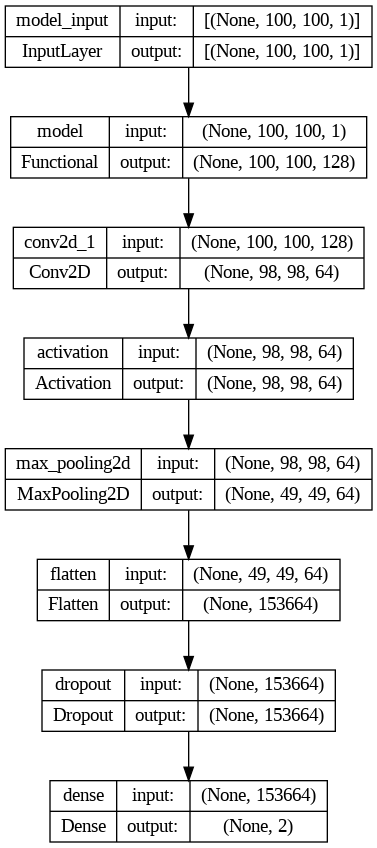

In [46]:
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [47]:
#SEM VALIDAÇÃO CRUZADA

from sklearn.model_selection import train_test_split

train_data,test_data,train_target,test_target=train_test_split(data,target,test_size=0.10) # test_size corresponde a 10% do banco de dados total

checkpoint = ModelCheckpoint('model-{epoch:03d}.model ',monitor='val_loss',verbose=0,save_best_only=True,mode='auto',save_weights_only=True)
history=model.fit(train_data,train_target,epochs=20,callbacks=[checkpoint],validation_split=0.10) 


# validation_split corresponde a 10% do banco de dados de treino, ou seja, 9% do total

Epoch 1/20
49/49 [==============================] - 13s 59ms/step - loss: 0.3245 - accuracy: 0.8913 - val_loss: 0.0987 - val_accuracy: 0.9538
Epoch 2/20
49/49 [==============================] - 2s 40ms/step - loss: 0.0871 - accuracy: 0.9672 - val_loss: 0.0650 - val_accuracy: 0.9827
Epoch 3/20
49/49 [==============================] - 2s 39ms/step - loss: 0.0606 - accuracy: 0.9781 - val_loss: 0.0514 - val_accuracy: 0.9827
Epoch 4/20
49/49 [==============================] - 2s 41ms/step - loss: 0.0334 - accuracy: 0.9871 - val_loss: 0.0464 - val_accuracy: 0.9827
Epoch 5/20
49/49 [==============================] - 2s 40ms/step - loss: 0.0359 - accuracy: 0.9865 - val_loss: 0.0772 - val_accuracy: 0.9653
Epoch 6/20
49/49 [==============================] - 2s 39ms/step - loss: 0.0163 - accuracy: 0.9942 - val_loss: 0.0584 - val_accuracy: 0.9769
Epoch 7/20
49/49 [==============================] - 2s 39ms/step - loss: 0.0115 - accuracy: 0.9949 - val_loss: 0.0823 - val_accuracy: 0.9711
Epoch 8/20
4

In [48]:
# Plot the curves of training and validation loss and accuracy
plt.plot(avg_train_acc, label='Acurácia de Treinamento')
plt.plot(avg_val_acc, label='Acurácia de Validação')
#plt.plot(avg_train_acc, label='Training Accuracy')
#plt.plot(avg_val_acc, label='Validation Accuracy')
plt.xlabel('# epochs')
plt.ylabel('Acurácia')
plt.legend(loc="lower right", prop={'size': 10})
plt.show()

NameError: ignored

In [ ]:
# Plot the curves of training and validation loss and accuracy
plt.plot(avg_train_loss, label='Perda de Treinamento')
plt.plot(avg_val_loss, label='Perda de Validação')
#plt.plot(avg_train_acc, label='Training Accuracy')
#plt.plot(avg_val_acc, label='Validation Accuracy')
plt.xlabel('# epochs')
plt.ylabel('Perda')
plt.legend(loc="upper right", prop={'size': 10})
plt.show()

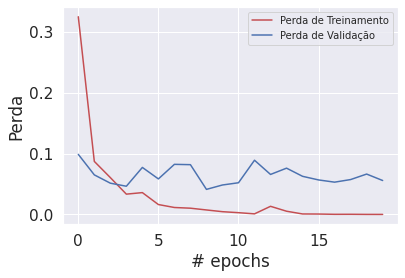

In [68]:
from matplotlib import pyplot as plt

plt.plot(history.history['loss'],'r',label='Perda de Treinamento')
plt.plot(history.history['val_loss'],label='Perda de Validação')
plt.xlabel('# epochs')
plt.ylabel('Perda')
plt.legend(loc="upper right", prop={'size': 10})
plt.show()

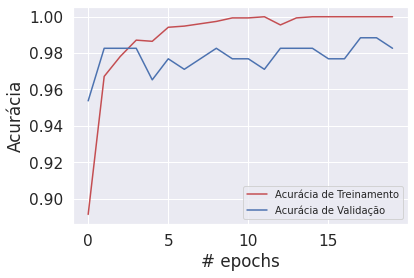

In [69]:
plt.plot(history.history['accuracy'],'r',label='Acurácia de Treinamento')
plt.plot(history.history['val_accuracy'],label='Acurácia de Validação')
plt.xlabel('# epochs')
plt.ylabel('Acurácia')
plt.legend(loc="lower right", prop={'size': 10})
plt.show()

In [51]:
print(model.evaluate(test_data,test_target))

7/7 [==============================] - 0s 36ms/step - loss: 0.0866 - accuracy: 0.9793
[0.08658678829669952, 0.9792746305465698]


##Matriz de Confusão

In [52]:
from sklearn.metrics import confusion_matrix

In [53]:
y_pred = model.predict(test_data)

7/7 [==============================] - 0s 10ms/step


In [54]:
y_true = [np.argmax(y, axis=None, out=None) for y in test_target]
y_true = np.array(y_true)

In [55]:
y_hat = [np.argmax(y, axis=None, out=None) for y in y_pred]
y_hat = np.array(y_hat)

In [56]:
cm = confusion_matrix(y_true, y_hat)

In [57]:
print(cm)

[[ 55   1]
 [  3 134]]


In [58]:
import seaborn as sn

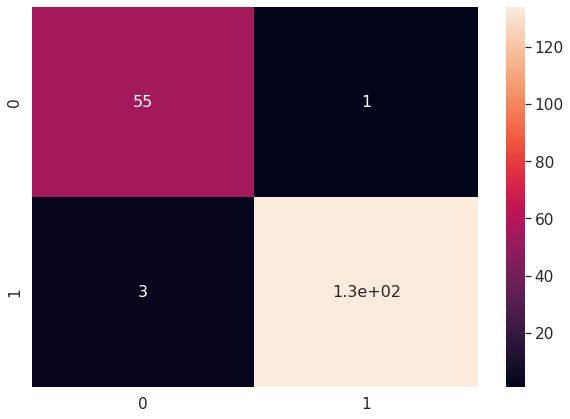

In [59]:
plt.figure(figsize = (10,7))
sn.set(font_scale=1.4)#for label size
sn.heatmap(cm, annot=True,annot_kws={"size": 16})# font size

In [60]:
from sklearn.metrics import recall_score
recall_score(y_true, y_hat, average='macro')

0.9801225234619395

In [61]:
from sklearn.metrics import f1_score
f1_score(y_true, y_hat, average='macro')

0.9751031991744066

##Curva ROC

ROC E AUROC


In [62]:
from sklearn.metrics import roc_curve, roc_auc_score

Calcular AUROC

In [63]:
# ROC é o receptor operando a característica AUROC (área sob a curva)
r_auc = roc_auc_score(y_true, y_hat)

Mostra os resultados AUROC

In [64]:
print('Neural Network Prediction: AUROC = %.4f' % (r_auc))

Neural Network Prediction: AUROC = 0.9801


Calcula a curva ROC

In [65]:
r_fpr, r_tpr, _ = roc_curve(y_true, y_hat)


Gráfico da Curva ROC

In [66]:
import matplotlib.pyplot as plt

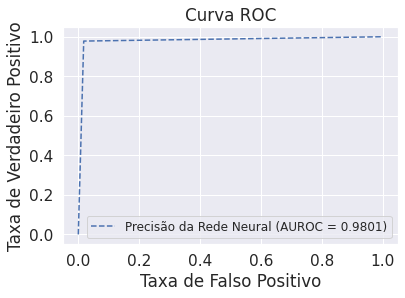

In [67]:
plt.plot(r_fpr, r_tpr, linestyle='--', label='Precisão da Rede Neural (AUROC = %0.4f)' % r_auc)


# Título
plt.title('Curva ROC')
# legendas eixos
plt.xlabel('Taxa de Falso Positivo')
plt.ylabel('Taxa de Verdadeiro Positivo')
# mostra legenda
plt.legend(loc="lower right", prop={'size': 12})
# mostra gráfico
plt.show()